# GIS with ![Python](https://www.python.org/static/community_logos/python-logo-inkscape.svg) and ![IPython](https://ipython.org/_static/IPy_header.png) 

# Getting some data

There are many sources of GIS data. Here are some useful links:

* [WorldMap](http://worldmap.harvard.edu/)
* [FAO's GeoNetwork](http://www.fao.org/geonetwork)
* [IPUMS USA Boundary files for Censuses](https://usa.ipums.org/usa/volii/boundaries.shtml)
* [IPUMS International Boundary files for Censuses](https://international.ipums.org/international/gis.shtml)
* [GADM database of Global Administrative Areas](http://www.gadm.org/)
* [Global Administrative Unit Layers](http://www.fao.org/geonetwork/srv/en/metadata.show?id=12691)
* [Natural Earth](http://www.naturalearthdata.com/): All kinds of geographical, cultural and socioeconomic variables
* [Global Map](http://www.iscgm.org/cgi-bin/fswiki/wiki.cgi?page=Summary)
* [Digital Chart of the World](http://worldmap.harvard.edu/data/geonode:Digital_Chart_of_the_World)
* [Sage](http://www.sage.wisc.edu/mapsdatamodels.html) and [Sage Atlas](http://www.sage.wisc.edu/atlas/maps.php)
* [Caloric Suitability Index CSI](https://ozak.github.io/Caloric-Suitability-Index/): Agricultural suitability data

* [Ramankutti's Datasets on land use, crops, etc.](http://www.geog.mcgill.ca/~nramankutty/Datasets/Datasets.html)
* [SEDAC at Columbia Univesrity](http://sedac.ciesin.columbia.edu/data/sets/browse): Gridded Population, Hazzards, etc.
* [World Port Index](http://msi.nga.mil/NGAPortal/MSI.portal?_nfpb=true&_pageLabel=msi_portal_page_62&pubCode=0015)
* [USGS elevation maps](http://eros.usgs.gov/elevation-products)
* [NOOA's Global Land One-km Base Elevation Project (GLOBE)](http://www.ngdc.noaa.gov/mgg/topo/globe.html)
* [NOOA Nightlight data](http://ngdc.noaa.gov/eog/download.html): This is the data used by Henderson, Storeygard, and Weil AER 2012 paper.
* [Other NOOA Data](http://www.ngdc.noaa.gov/ngdcinfo/onlineaccess.html)
* [GEcon](http://gecon.yale.edu/)
* [OpenStreetMap](http://openstreetmap.org)
* [U.S. Census TIGER](http://www.census.gov/geo/maps-data/data/tiger.html)
* [Geo-referencing of Ethnic Groups](http://www.icr.ethz.ch/data/other/greg)

See also [Wikipedia links](http://en.wikipedia.org/wiki/List_of_GIS_data_sources)

# Set-up

Let's import the packages we will use and set the paths for outputs.

In [1]:
# Let's import pandas and some other basic packages we will use 
from __future__ import division
%pylab --no-import-all
%matplotlib inline
import pandas as pd
import numpy as np
import os, sys

Using matplotlib backend: <object object at 0x11c2ec770>
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
# GIS packages
import geopandas as gpd
from geopandas.tools import overlay
from shapely.geometry import Polygon, Point
import georasters as gr
# Alias for Geopandas
gp = gpd

In [3]:
# Plotting
import matplotlib as mpl
import seaborn as sns
# Setup seaborn
sns.set()

In [4]:
# Paths
pathout = './data/'

if not os.path.exists(pathout):
    os.mkdir(pathout)
    
pathgraphs = './graphs/'
if not os.path.exists(pathgraphs):
    os.mkdir(pathgraphs)

# Initial Example -- Natural Earth Country Shapefile

Let's download a shapefile with all the polygons for countries so we can visualize and analyze some of the data we have downloaded in other notebooks. [Natural Earth](https://www.naturalearthdata.com/downloads/) provides lots of free data so let's use that one. 

For shapefiles and other polygon type data ``geopandas`` is the most useful package. ``geopandas`` is to GIS  what ``pandas`` is to other data. Since ``gepandas`` extends the functionality of ``pandas`` to a GIS dataset, all the nice functions and properties of ``pandas`` are also available in ``geopandas``. Of course, ``geopandas`` includes functions and properties unique to GIS data.

Next we will use it to download the shapefile (which is contained in a zip archive). ``geopandas`` extends ``pandas`` for use with GIS data. We can  use many functions and properties of the ``GeoDataFrame`` to analyze our data. 

In [5]:
import requests
import io

#headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
headers = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.103 Safari/537.36', 'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8'}

url = 'https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_0_countries.zip'
r = requests.get(url, headers=headers)
countries = gp.read_file(io.BytesIO(r.content))
#countries = gpd.read_file('https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/10m/cultural/ne_10m_admin_0_countries.zip')

Let's look inside this ``GeoDataFrame``

In [6]:
countries.head(10)

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,0,2,Indonesia,IDN,0,2,Sovereign country,1,Indonesia,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Admin-0 country,0,3,Malaysia,MYS,0,2,Sovereign country,1,Malaysia,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Admin-0 country,0,2,Chile,CHL,0,2,Sovereign country,1,Chile,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Admin-0 country,0,3,Bolivia,BOL,0,2,Sovereign country,1,Bolivia,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,Admin-0 country,0,2,Peru,PER,0,2,Sovereign country,1,Peru,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."
5,Admin-0 country,0,2,Argentina,ARG,0,2,Sovereign country,1,Argentina,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-67.19390 -22.82222, -67.14269..."
6,Admin-0 country,3,3,United Kingdom,GB1,1,2,Dependency,1,Dhekelia Sovereign Base Area,...,Admin-0 dependency,None,Admin-0 dependency,Admin-0 dependency,Admin-0 dependency,Admin-0 dependency,Admin-0 dependency,None,Admin-0 dependency,"POLYGON ((33.78094 34.97635, 33.76043 34.97968..."
7,Admin-0 country,1,5,Cyprus,CYP,0,2,Sovereign country,1,Cyprus,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((33.78183 34.97622, 33.78094 34..."
8,Admin-0 country,0,2,India,IND,0,2,Sovereign country,1,India,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((77.80035 35.49541, 77.81533 35..."
9,Admin-0 country,0,2,China,CH1,1,2,Country,1,China,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((78.91769 33.38626, 78.91595 33..."


Each row contains the information for one country. 

Each column is one property or variable. 

Unlike ``pandas`` ``DataFrame``s, ``geopandas`` always must have a ``geometry`` column. 

Let's plot this data

Text(0.5, 1.0, 'WGS84 (lat/lon)')

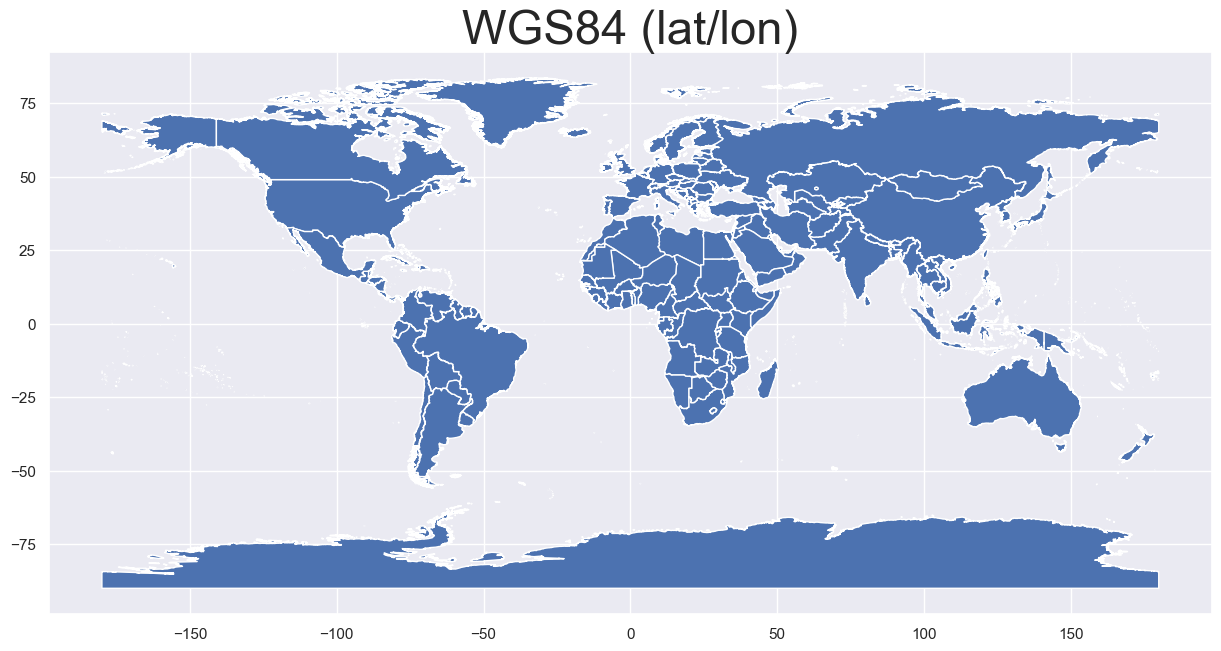

In [7]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(15,10))
countries.plot(ax=ax)
ax.set_title("WGS84 (lat/lon)", fontdict={'fontsize':34})

We can also get some additional information on this data. For example its projection

In [8]:
countries.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

We can reproject the data from its current WGS84 projection to other ones. Let's do this and plot the results so we can see how different projections distort results.

Text(0.5, 1.0, 'Mercator')

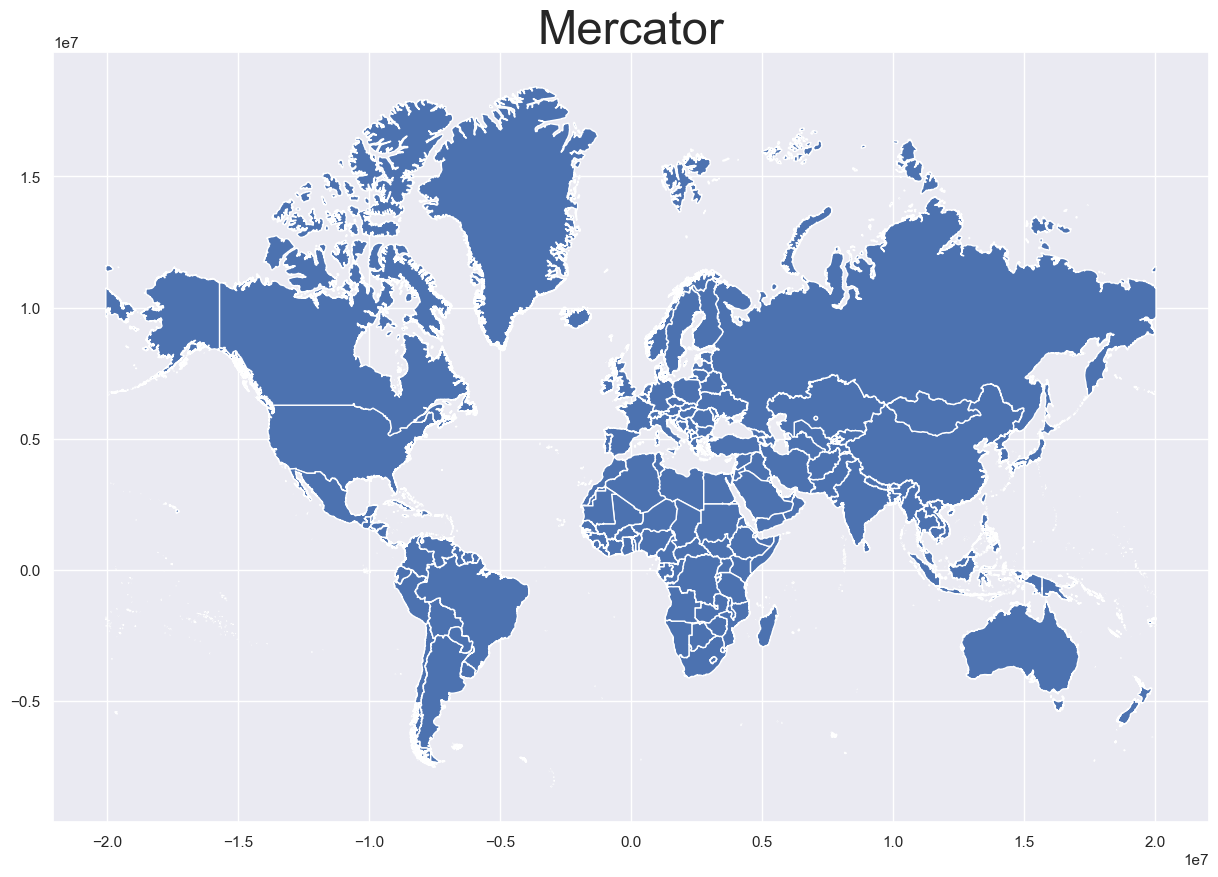

In [9]:
fig, ax = plt.subplots(figsize=(15,10))
countries_merc = countries.to_crs(epsg=3857)
countries_merc.loc[countries_merc.NAME!='Antarctica'].reset_index().plot(ax=ax)
ax.set_title("Mercator", fontdict={'fontsize':34})

In [10]:
countries_merc.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Text(0.5, 1.0, 'Cylindrical Equal Area')

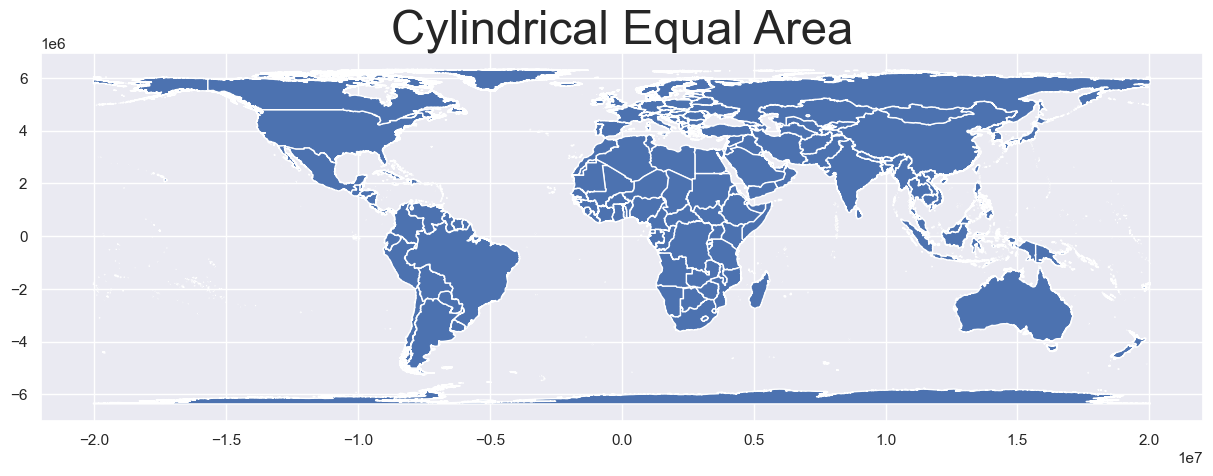

In [11]:
cea = {'datum': 'WGS84',
 'lat_ts': 0,
 'lon_0': 0,
 'no_defs': True,
 'over': True,
 'proj': 'cea',
 'units': 'm',
 'x_0': 0,
 'y_0': 0}

cea = 'ESRI:54034'
fig, ax = plt.subplots(figsize=(15,10))
countries_cea = countries.to_crs(crs=cea)
countries_cea.plot(ax=ax)
ax.set_title("Cylindrical Equal Area", fontdict={'fontsize':34})

Notice that each projection shows the world in a very different manner, distoring areas, distances etc. So you need to take care when doing computations to use the correct projection. An important issue to remember is that you need a projected (not geographical) projection to compute areas and distances. Let's compare these three a bit. Start with the boundaries of each.

In [12]:
print('[xmin, ymin, xmax, ymax] in three projections')
print(countries.total_bounds)
print(countries_merc.total_bounds)
print(countries_cea.total_bounds)

[xmin, ymin, xmax, ymax] in three projections
[-180.          -90.          180.           83.63410065]
[-2.00375083e+07 -2.25045148e+08  2.00375083e+07  1.84289200e+07]
[-20037508.34278923  -6363885.33192604  20037508.34278924
   6324296.52646162]


Let's describe the areas of these countries in the three projections

In [13]:
print('Area distribution in WGS84')
print(countries.area.describe(), '\n')

Area distribution in WGS84
count     258.000000
mean       83.053683
std       443.786684
min         0.000001
25%         0.065859
50%         5.857276
75%        37.279026
max      6049.574693
dtype: float64 



/var/folders/2r/7vb_23y1427bffj2wbz7mxfc0000gq/T/ipykernel_95239/1371744286.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  print(countries.area.describe(), '\n')


In [14]:
print('Area distribution in Mercator')
print(countries_merc.area.describe(), '\n')

Area distribution in Mercator
count    2.580000e+02
mean     3.423154e+13
std      5.295922e+14
min      2.204709e+04
25%      9.801617e+08
50%      8.692411e+10
75%      5.411109e+11
max      8.507102e+15
dtype: float64 



In [15]:
print('Area distribution in CEA')
print(countries_cea.area.describe(), '\n')

Area distribution in CEA
count    2.580000e+02
mean     5.690945e+11
std      1.826917e+12
min      1.220383e+04
25%      6.986665e+08
50%      5.148888e+10
75%      3.544773e+11
max      1.698019e+13
dtype: float64 



In [16]:
countries['geometry']

0      MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...
1      MULTIPOLYGON (((117.70361 4.16341, 117.69711 4...
2      MULTIPOLYGON (((-69.51009 -17.50659, -69.50611...
3      POLYGON ((-69.51009 -17.50659, -69.51009 -17.5...
4      MULTIPOLYGON (((-69.51009 -17.50659, -69.63832...
                             ...                        
253    MULTIPOLYGON (((113.55860 22.16303, 113.56943 ...
254    POLYGON ((123.59702 -12.42832, 123.59775 -12.4...
255    POLYGON ((-79.98929 15.79495, -79.98782 15.796...
256    POLYGON ((-78.63707 15.86209, -78.64041 15.864...
257    POLYGON ((117.75389 15.15437, 117.75569 15.151...
Name: geometry, Length: 258, dtype: geometry

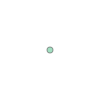

In [17]:
Point((0,0))

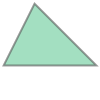

In [18]:
Polygon(((0,0), (1,2), (3,0)))

Let's compare the area of each country in the two projected projections

Text(0.5, 1.0, 'Areas')

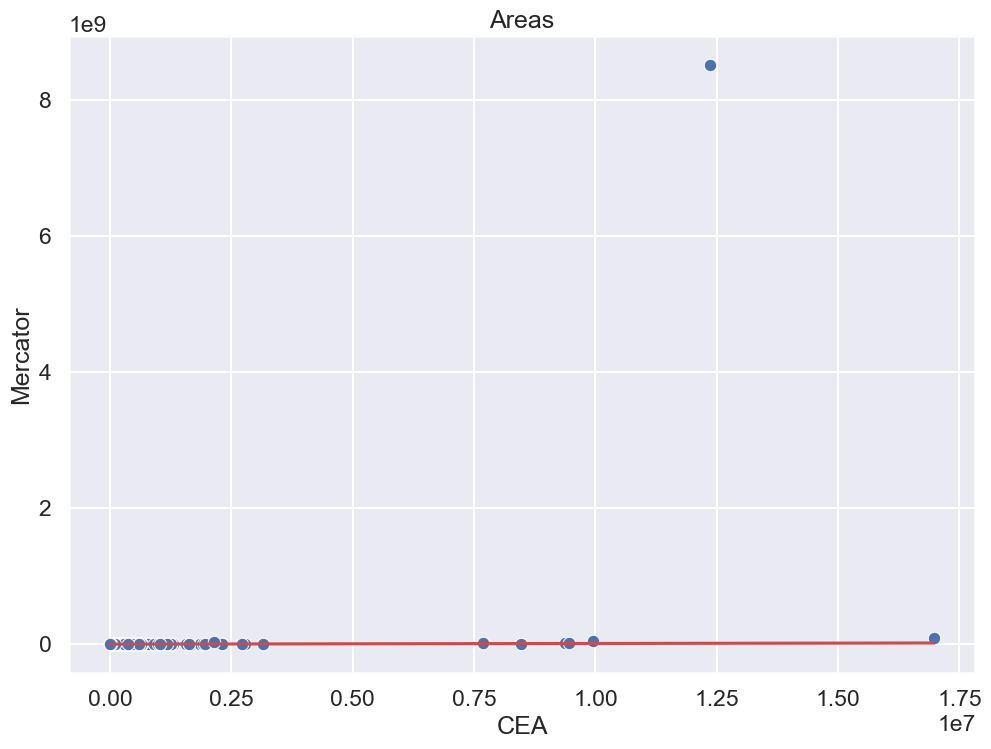

In [19]:
countries_merc = countries_merc.set_index('ADM0_A3')
countries_cea = countries_cea.set_index('ADM0_A3')
countries_merc['ratio_area'] = countries_merc.area / countries_cea.area
countries_cea['ratio_area'] = countries_merc.area / countries_cea.area
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_context("talk")
fig, ax = plt.subplots()
sns.scatterplot(x=countries_cea.area/1e6, y=countries_merc.area/1e6, ax=ax)
sns.lineplot(x=countries_cea.area/1e6, y=countries_cea.area/1e6, color='r', ax=ax)
ax.set_ylabel('Mercator')
ax.set_xlabel('CEA')
ax.set_title("Areas")

Now, how do we know what is correct? Let's get some data from WDI to compare the areas of countries in these projections to what the correct area should be (notice that each country usually will use a local projection that ensures areas are correctly computed, so their data should be closer to the truth than any of our global ones). 

Here we use some of what we learned before in [this notebook](./EconomicDataAnalysis.ipynb).

In [20]:
from pandas_datareader import data, wb
wbcountries = wb.get_countries()
wbcountries['name'] = wbcountries.name.str.strip()
wdi = wb.download(indicator=['AG.LND.TOTL.K2'], country=wbcountries.iso2c.values, start=2017, end=2017)
wdi.columns = ['WDI_area']
wdi = wdi.reset_index()
wdi = wdi.merge(wbcountries[['iso3c', 'iso2c', 'name']], left_on='country', right_on='name')

countries_cea['CEA_area'] = countries_cea.area / 1e6
countries_merc['MERC_area'] = countries_merc.area / 1e6
areas = pd.merge(countries_cea['CEA_area'], countries_merc['MERC_area'], left_index=True, right_index=True)

/Users/ozak/miniforge3/envs/GeoPython311env/lib/python3.11/site-packages/pandas_datareader/wb.py:592: UserWarning: Non-standard ISO country codes: 1A, 1W, 4E, 6F, 6N, 6X, 7E, 8S, A4, A5, A9, B1, B2, B3, B4, B6, B7, B8, C4, C5, C6, C7, C8, C9, D2, D3, D4, D5, D6, D7, EU, F1, F6, JG, M1, M2, N6, OE, R6, S1, S2, S3, S4, T2, T3, T4, T5, T6, T7, V1, V2, V3, V4, XC, XD, XE, XF, XG, XH, XI, XJ, XK, XL, XM, XN, XO, XP, XQ, XT, XU, XY, Z4, Z7, ZB, ZF, ZG, ZH, ZI, ZJ, ZQ, ZT
  warnings.warn(
/var/folders/2r/7vb_23y1427bffj2wbz7mxfc0000gq/T/ipykernel_95239/2997326858.py:4: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  wdi = wb.download(indicator=['AG.LND.TOTL.K2'], country=wbcountries.iso2c.values, start=2017, end=2017)


Let's merge the WDI data with what we have computed before.

In [21]:
wdi = wdi.merge(areas, left_on='iso3c', right_index=True)
wdi

,country,year,WDI_area,iso3c,iso2c,name,CEA_area,MERC_area
0,Aruba,2017,180.0,ABW,AW,Aruba,1.697662e+02,1.792215e+02
2,Afghanistan,2017,652230.0,AFG,AF,Afghanistan,6.421811e+05,9.349973e+05
4,Angola,2017,1246700.0,AGO,AO,Angola,1.244652e+06,1.316011e+06
5,Albania,2017,27400.0,ALB,AL,Albania,2.833579e+04,5.002434e+04
6,Andorra,2017,470.0,AND,AD,Andorra,4.522394e+02,8.335608e+02
...,...,...,...,...,...,...,...,...
260,Samoa,2017,2780.0,WSM,WS,Samoa,2.780425e+03,2.964662e+03
262,"Yemen, Rep.",2017,527970.0,YEM,YE,"Yemen, Rep.",4.530748e+05,4.929999e+05
263,South Africa,2017,1213090.0,ZAF,ZA,South Africa,1.219825e+06,1.605941e+06
264,Zambia,2017,743390.0,ZMB,ZM,Zambia,7.519143e+05,8.011173e+05


How correlated are these measures?

In [24]:
wdi.corr(numeric_only=True)

,WDI_area,CEA_area,MERC_area
WDI_area,1.000000,0.997195,0.822258
CEA_area,0.997195,1.000000,0.852868
MERC_area,0.822258,0.852868,1.000000


Let's change the shape of the data so we can plot it using ``seaborn``.

In [25]:
wdi2 = wdi.melt(id_vars=['iso3c', 'iso2c', 'name', 'country', 'year', 'WDI_area'], value_vars=['CEA_area', 'MERC_area'])
wdi2

,iso3c,iso2c,name,country,year,WDI_area,variable,value
0,ABW,AW,Aruba,Aruba,2017,180.0,CEA_area,1.697662e+02
1,AFG,AF,Afghanistan,Afghanistan,2017,652230.0,CEA_area,6.421811e+05
2,AGO,AO,Angola,Angola,2017,1246700.0,CEA_area,1.244652e+06
3,ALB,AL,Albania,Albania,2017,27400.0,CEA_area,2.833579e+04
4,AND,AD,Andorra,Andorra,2017,470.0,CEA_area,4.522394e+02
...,...,...,...,...,...,...,...,...
421,WSM,WS,Samoa,Samoa,2017,2780.0,MERC_area,2.964662e+03
422,YEM,YE,"Yemen, Rep.","Yemen, Rep.",2017,527970.0,MERC_area,4.929999e+05
423,ZAF,ZA,South Africa,South Africa,2017,1213090.0,MERC_area,1.605941e+06
424,ZMB,ZM,Zambia,Zambia,2017,743390.0,MERC_area,8.011173e+05


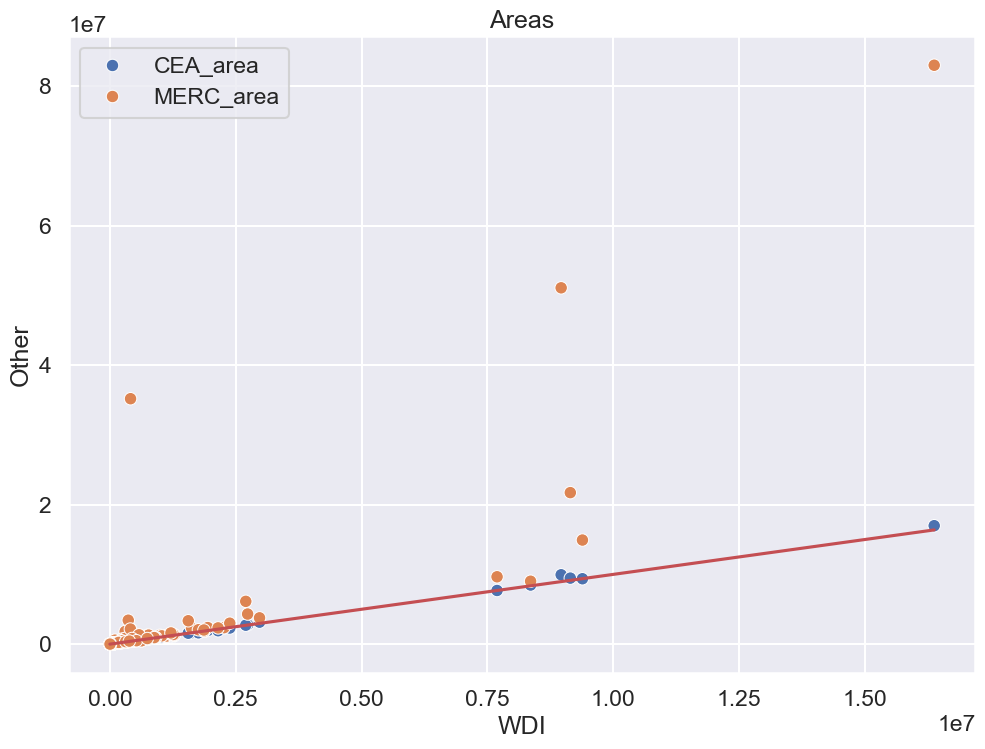

In [26]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_context("talk")
fig, ax = plt.subplots()
sns.scatterplot(x='WDI_area', y='value', data=wdi2, hue='variable', ax=ax)
#sns.scatterplot(x='WDI_area', y='MERC_area', data=wdi, ax=ax)
sns.lineplot(x='WDI_area', y='WDI_area', data=wdi, color='r', ax=ax)
ax.set_ylabel('Other')
ax.set_xlabel('WDI')
ax.set_title("Areas")
ax.legend()

We could use other data to compare, e.g. data from the CIA Factbook.

In [27]:
cia_area = pd.read_csv('https://web.archive.org/web/20201116182145if_/https://www.cia.gov/LIBRARY/publications/the-world-factbook/rankorder/rawdata_2147.txt', sep='\t', header=None)
cia_area = pd.DataFrame(cia_area[0].str.strip().str.split('\s\s+').tolist(), columns=['id', 'Name', 'area'])
cia_area.area = cia_area.area.str.replace(',', '').astype(int)
cia_area

,id,Name,area
0,1,Russia,17098242
1,2,Antarctica,14000000
2,3,Canada,9984670
3,4,United States,9833517
4,5,China,9596960
...,...,...,...
249,250,Spratly Islands,5
250,251,Ashmore and Cartier Islands,5
251,252,Coral Sea Islands,3
252,253,Monaco,2


In [28]:
print('CEA area for Russia', countries_cea.area.loc['RUS'] / 1e6)
print('MERC area for Russia', countries_merc.area.loc['RUS'] / 1e6)
print('WDI area for Russia', wdi.loc[wdi.iso3c=='RUS', 'WDI_area'])
print('CIA area for Russia', cia_area.loc[cia_area.Name=='Russia', 'area'])

CEA area for Russia 16980189.52844945
MERC area for Russia 82997412.6652339
WDI area for Russia 202    16376870.0
Name: WDI_area, dtype: float64
CIA area for Russia 0    17098242
Name: area, dtype: int64


Again very similar result. ``CEA`` is closest to both ``WDI`` and ``CIA``. 

## Exercise

1. Merge the ``CIA`` data with the wdi data. You need to get correct codes for the countries to allow for the merge or correct the names to ensure they are compatible.
2. Change the dataframe as we did with ``wdi2`` and plot the association between these measures

# Mapping data

Let's use the ``geoplot`` package to plot data in a map. As usual we can do it in many ways, but ``geoplot``  makes our life very easy. Let's import the various packages we will use.

In [29]:
import geoplot as gplt
import geoplot.crs as gcrs
import mapclassify as mc
import textwrap

Let's import some of the data we had downloaded before. Specifically, let's import the Penn World Tables data.

In [31]:
pwt = pd.read_stata(pathout + 'pwt.dta')
pwt_xls = pd.read_excel(pathout + 'pwt.xlsx')
pwt

,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,...,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k
0,ABW,Aruba,Aruban Guilder,1950,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,Aruban Guilder,1951,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,Aruban Guilder,1952,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABW,Aruba,Aruban Guilder,1953,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,Aruban Guilder,1954,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12805,ZWE,Zimbabwe,US Dollar,2015,40141.617188,39798.644531,13.814629,6.393752,NaN,2.584653,...,0.140172,-0.287693,-0.051930,0.479228,0.651287,0.541446,0.616689,0.533235,0.425715,1.778124
12806,ZWE,Zimbabwe,US Dollar,2016,41875.203125,40963.191406,14.030331,6.504374,NaN,2.616257,...,0.131920,-0.251232,-0.016258,0.470640,0.651027,0.539631,0.619789,0.519718,0.419446,1.728804
12807,ZWE,Zimbabwe,US Dollar,2017,44672.175781,44316.742188,14.236595,6.611773,NaN,2.648248,...,0.126722,-0.202827,-0.039897,0.473560,0.639560,0.519956,0.619739,0.552042,0.418681,1.756007
12808,ZWE,Zimbabwe,US Dollar,2018,44325.109375,43420.898438,14.438802,6.714952,NaN,2.680630,...,0.144485,-0.263658,-0.020791,0.543757,0.655473,0.529867,0.641361,0.561526,0.426527,1.830088


Let's recreate GDPpc data

In [32]:
# Get columns with GDP measures
gdpcols = pwt_xls.loc[pwt_xls['Variable definition'].apply(lambda x: str(x).upper().find('REAL GDP')!=-1), 'Variable name'].tolist()

# Generate GDPpc for each measure
for gdp in gdpcols:
    pwt[gdp + '_pc'] = pwt[gdp] / pwt['pop']

# GDPpc data
gdppccols = [col+'_pc' for col in gdpcols]
pwt[['countrycode', 'country', 'year'] + gdppccols]

,countrycode,country,year,rgdpe_pc,rgdpo_pc,cgdpe_pc,cgdpo_pc,rgdpna_pc
0,ABW,Aruba,1950,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,1951,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,1952,NaN,NaN,NaN,NaN,NaN
3,ABW,Aruba,1953,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,1954,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
12805,ZWE,Zimbabwe,2015,2905.732553,2880.905780,2892.674328,2856.095690,3040.848887
12806,ZWE,Zimbabwe,2016,2984.619759,2919.616893,2970.770578,2912.558803,3016.730437
12807,ZWE,Zimbabwe,2017,3137.841301,3112.875107,3137.841301,3112.875107,3112.875107
12808,ZWE,Zimbabwe,2018,3069.860600,3007.236919,3071.061791,3017.391036,3217.517468


Let's map GDPpc for the year 2010 using ``geoplot``. For this, let's write two functions that will simplify plotting and saving maps. Also, we can reuse it whenever we need to create a new map for the world. 

In [33]:
# Functions for plotting
def center_wrap(text, cwidth=32, **kw):
    '''Center Text (to be used in legend)'''
    lines = text
    #lines = textwrap.wrap(text, **kw)
    return "\n".join(line.center(cwidth) for line in lines)

def MyChoropleth(mydf=pwt.loc[pwt.year==2010], myfile='GDPpc2010', myvar='rgdpe_pc',
                  mylegend='GDP per capita 2010',
                  k=5,
                  extent=[-180, -90, 180, 90],
                  bbox_to_anchor=(0.2, 0.5),
                  edgecolor='white', facecolor='lightgray',
                  scheme='FisherJenks',
                  save=True,
                  percent=False,
                  **kwargs):
    # Chloropleth
    # Color scheme
    if scheme=='EqualInterval':
        scheme = mc.EqualInterval(mydf[myvar], k=k)
    elif scheme=='Quantiles':
        scheme = mc.Quantiles(mydf[myvar], k=k)
    elif scheme=='BoxPlot':
        scheme = mc.BoxPlot(mydf[myvar], k=k)
    elif scheme=='FisherJenks':
        scheme = mc.FisherJenks(mydf[myvar], k=k)
    elif scheme=='FisherJenksSampled':
        scheme = mc.FisherJenksSampled(mydf[myvar], k=k)
    elif scheme=='HeadTailBreaks':
        scheme = mc.HeadTailBreaks(mydf[myvar], k=k)
    elif scheme=='JenksCaspall':
        scheme = mc.JenksCaspall(mydf[myvar], k=k)
    elif scheme=='JenksCaspallForced':
        scheme = mc.JenksCaspallForced(mydf[myvar], k=k)
    elif scheme=='JenksCaspallSampled':
        scheme = mc.JenksCaspallSampled(mydf[myvar], k=k)
    elif scheme=='KClassifiers':
        scheme = mc.KClassifiers(mydf[myvar], k=k)
    # Format legend
    upper_bounds = scheme.bins
    # get and format all bounds
    bounds = []
    for index, upper_bound in enumerate(upper_bounds):
        if index == 0:
            lower_bound = mydf[myvar].min()
        else:
            lower_bound = upper_bounds[index-1]
        # format the numerical legend here
        if percent:
            bound = f'{lower_bound:.0%} - {upper_bound:.0%}'
        else:
            bound = f'{float(lower_bound):,.0f} - {float(upper_bound):,.0f}'
        bounds.append(bound)
    legend_labels = bounds
    #Plot
    ax = gplt.choropleth(
        mydf, hue=myvar, projection=gcrs.PlateCarree(central_longitude=0.0, globe=None),
        edgecolor='white', linewidth=1,
        cmap='Reds', legend=True,
        scheme=scheme,
        legend_kwargs={'bbox_to_anchor': bbox_to_anchor,
                       'frameon': True,
                       'title':mylegend,
                       },
        legend_labels = legend_labels,
        figsize=(24, 16),
        rasterized=True,
    )
    gplt.polyplot(
        countries, projection=gcrs.PlateCarree(central_longitude=0.0, globe=None),
        edgecolor=edgecolor, facecolor=facecolor,
        ax=ax,
        rasterized=True,
        extent=extent,
    )
    if save:
        plt.savefig(pathgraphs + myfile + '_' + myvar +'.pdf', dpi=300, bbox_inches='tight')
        plt.savefig(pathgraphs + myfile + '_' + myvar +'.png', dpi=300, bbox_inches='tight')
    pass


Let's merge the PWT GDPpc data with our shape file.

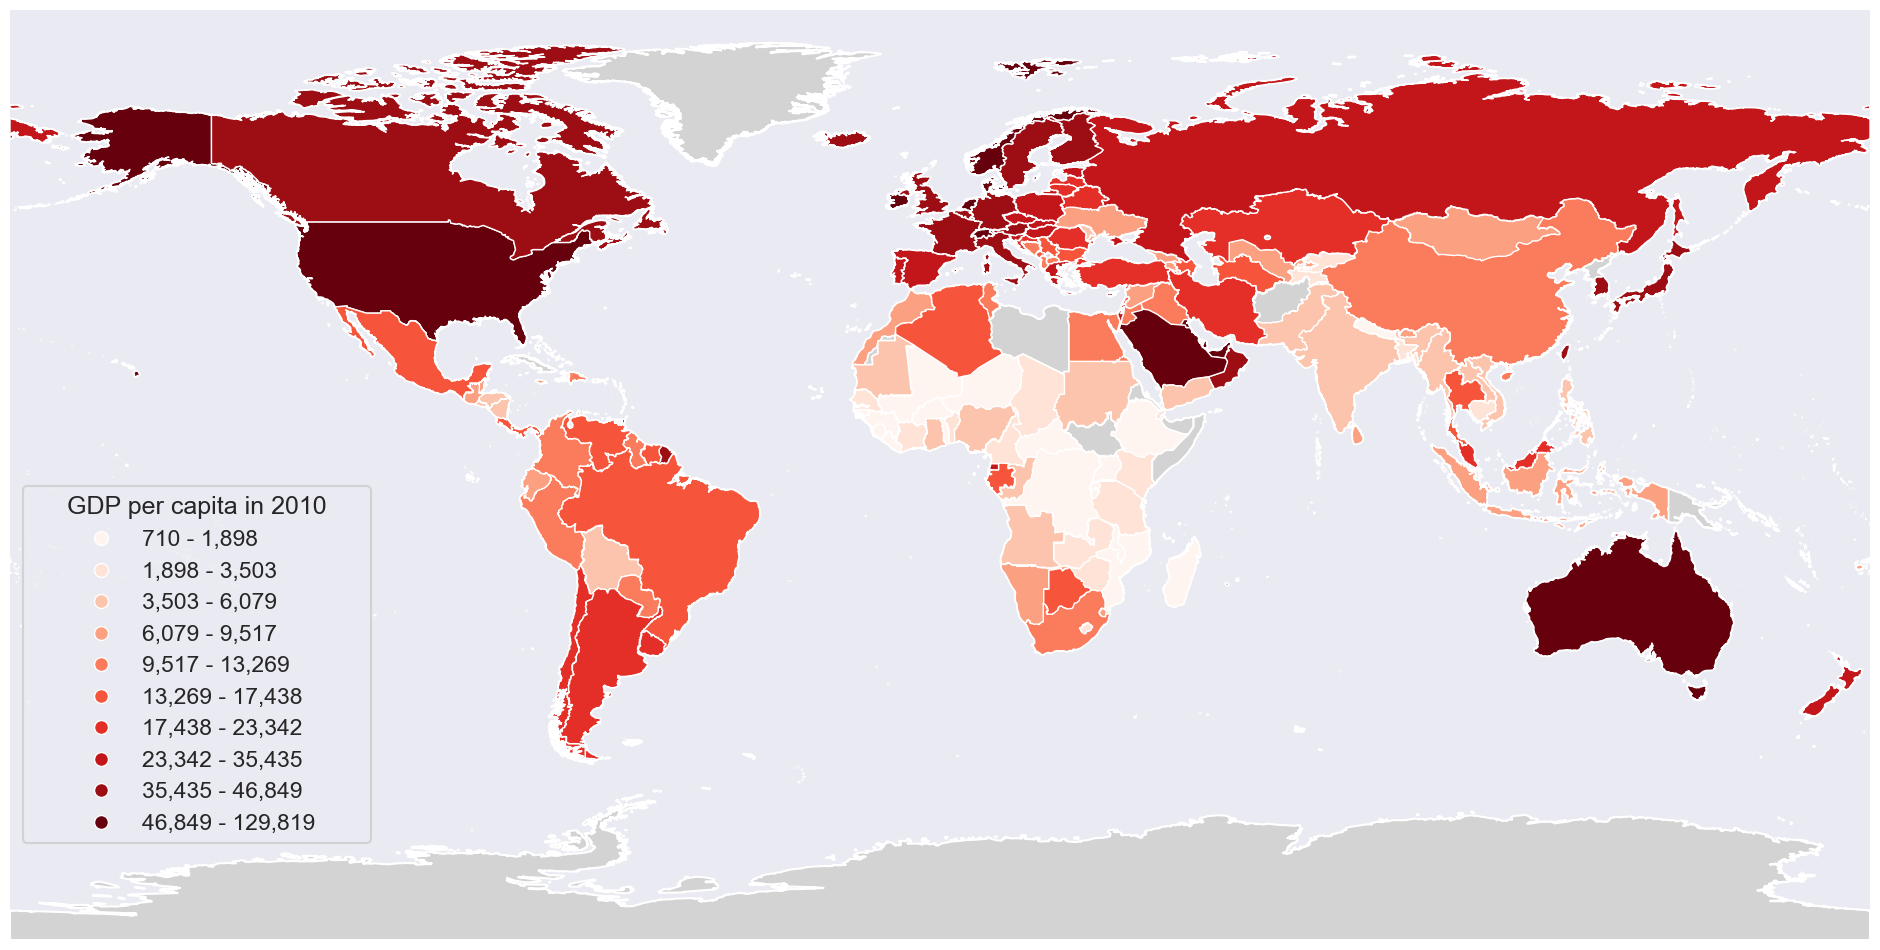

In [34]:
year = 2010
gdppc = pwt.loc[pwt.year==year].reset_index(drop=True).copy()
gdppc = countries.merge(gdppc, left_on='ADM0_A3', right_on='countrycode')
gdppc = gdppc.dropna(subset=['rgdpe_pc'])
mylegend = center_wrap(["GDP per capita in " + str(year)], cwidth=32, width=32)
MyChoropleth(mydf=gdppc, myfile='PWT_GDP_' + str(year), myvar='rgdpe_pc', mylegend=mylegend, k=10, scheme='Quantiles', save=True)

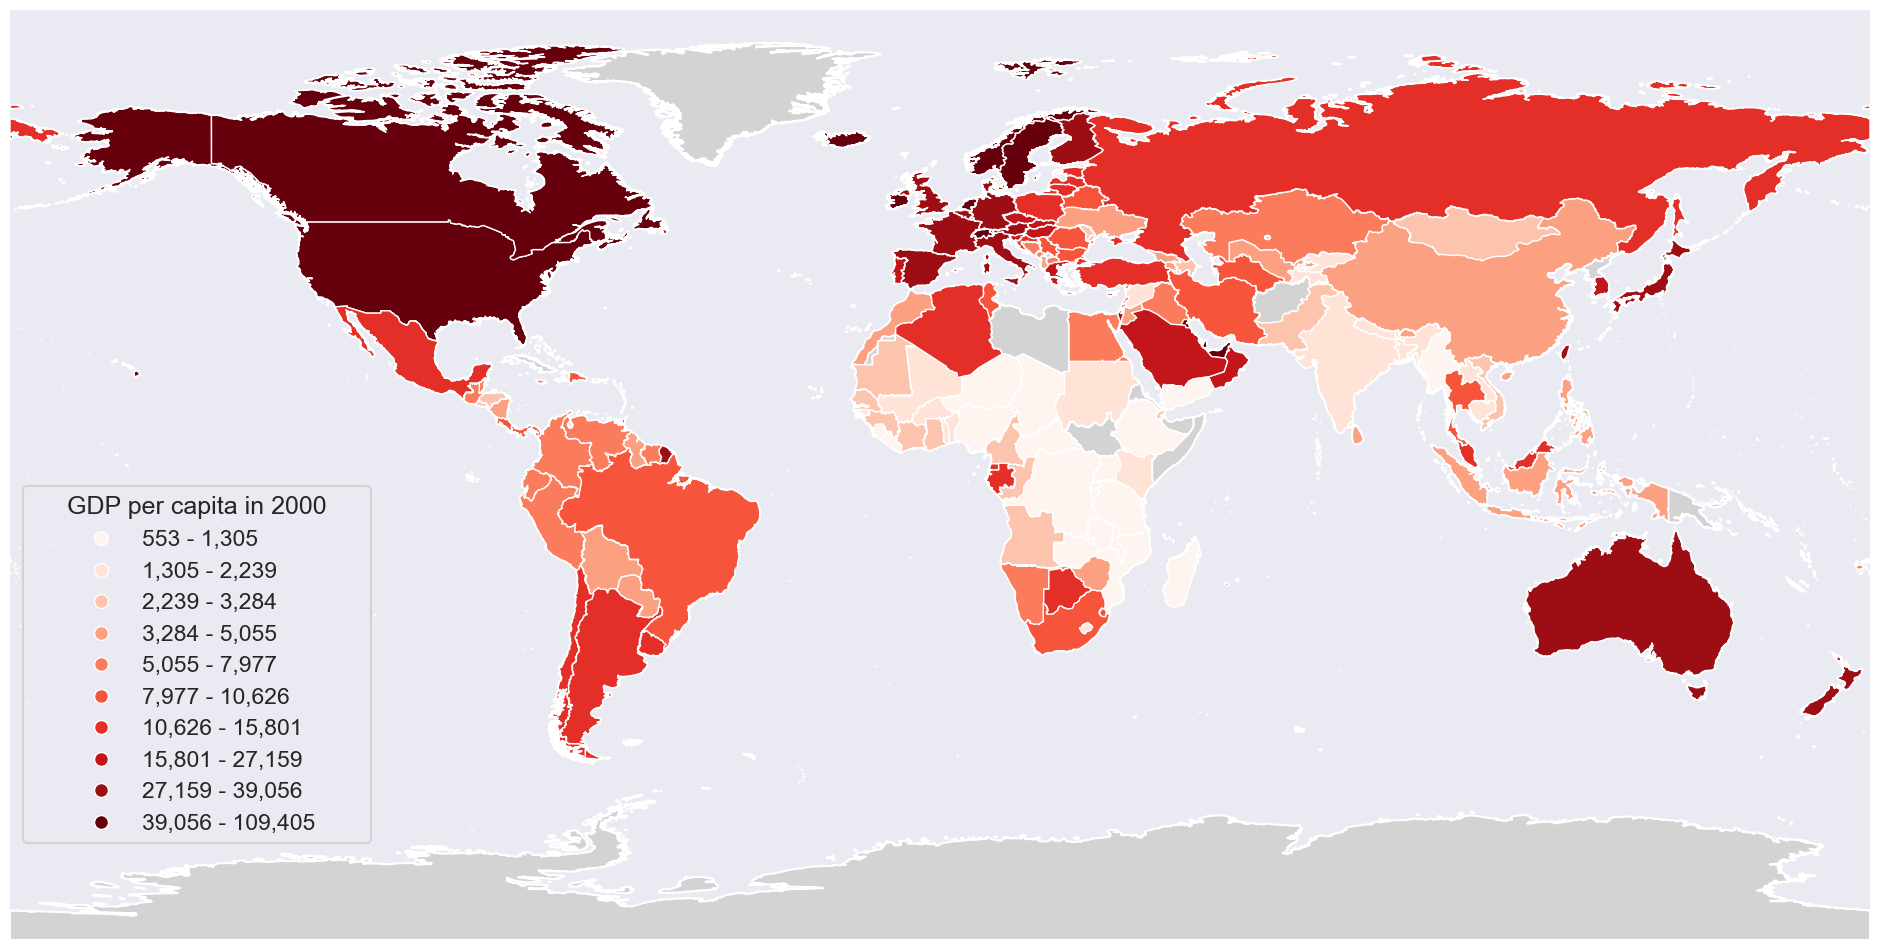

In [35]:
year = 2000
gdppc = pwt.loc[pwt.year==year].reset_index(drop=True).copy()
gdppc = countries.merge(gdppc, left_on='ADM0_A3', right_on='countrycode')
gdppc = gdppc.dropna(subset=['rgdpe_pc'])
mylegend = center_wrap(["GDP per capita in " + str(year)], cwidth=32, width=32)
MyChoropleth(mydf=gdppc, myfile='PWT_GDP_' + str(year), myvar='rgdpe_pc', mylegend=mylegend, k=10, scheme='Quantiles', save=True)

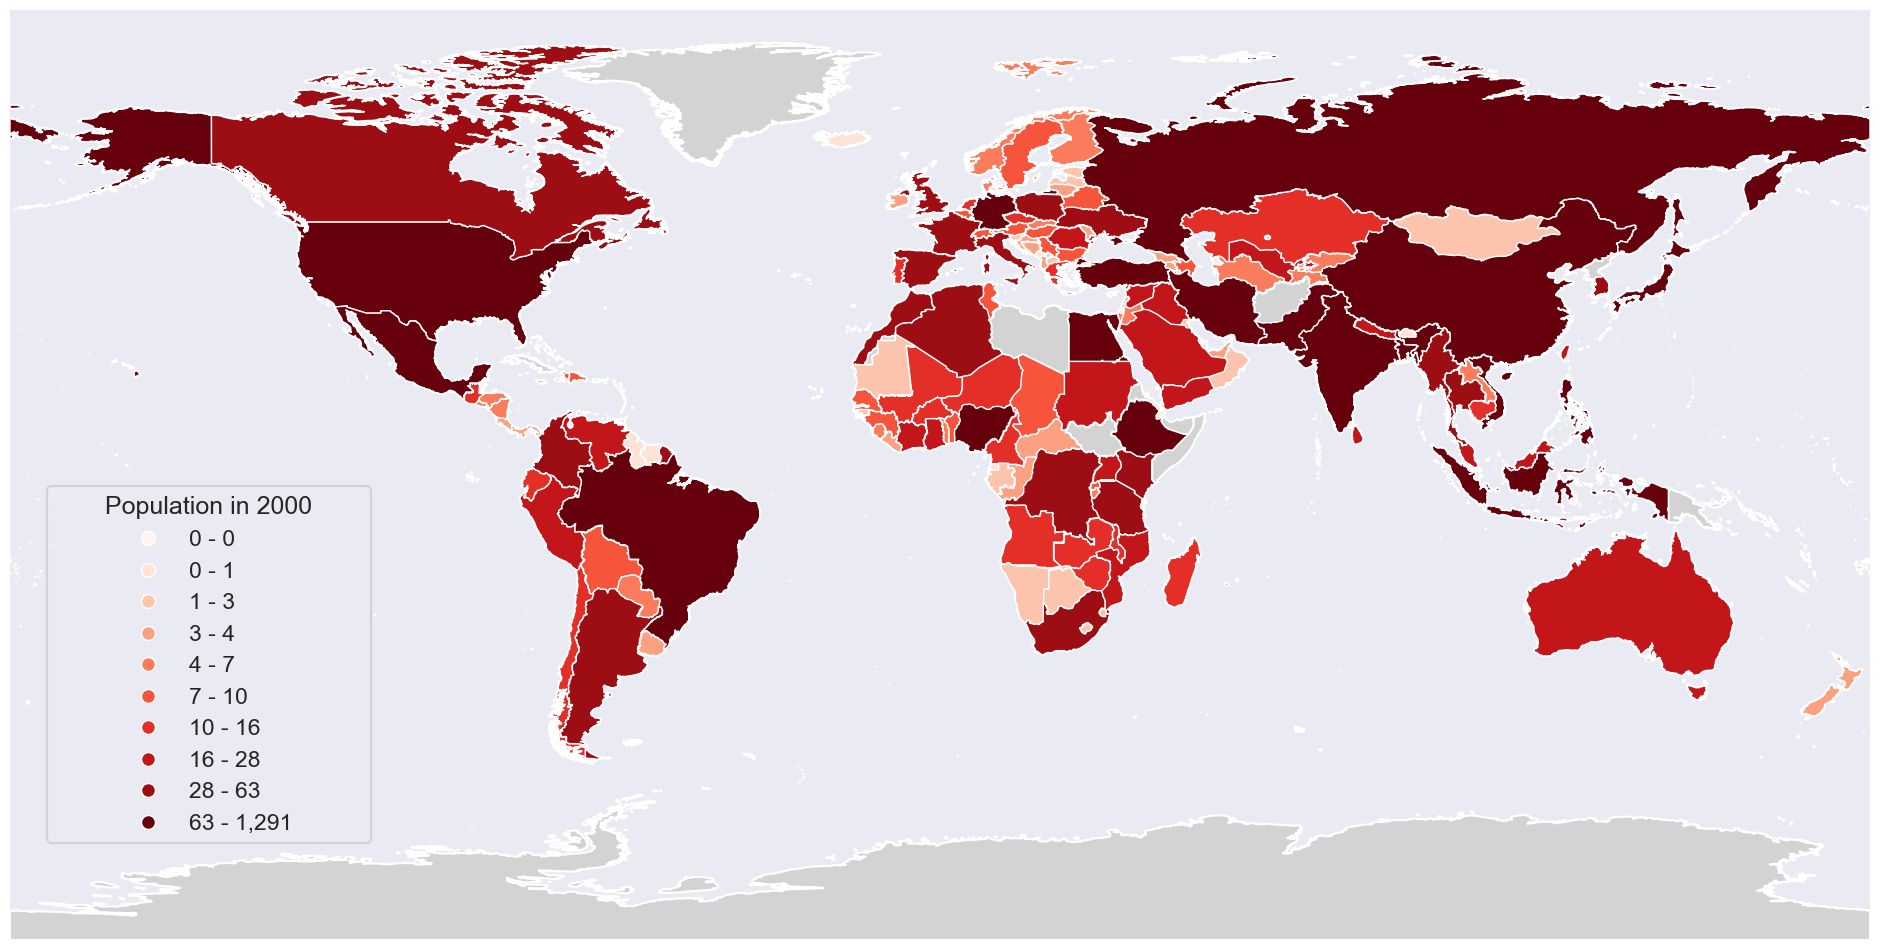

In [36]:
year = 2000
gdppc = pwt.loc[pwt.year==year].reset_index(drop=True).copy()
gdppc = countries.merge(gdppc, left_on='ADM0_A3', right_on='countrycode')
gdppc = gdppc.dropna(subset=['pop'])
mylegend = center_wrap(["Population in " + str(year)], cwidth=32, width=32)
MyChoropleth(mydf=gdppc, myfile='PWT_POP_' + str(year), myvar='pop', mylegend=mylegend, k=10, scheme='Quantiles', save=True)

# GIS operations, functions and properties

Let's explore the data with some of the functions of ``geopandas``. 

Let's start by finding the centroid of every country and plot it.

/var/folders/2r/7vb_23y1427bffj2wbz7mxfc0000gq/T/ipykernel_95239/1290617103.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids.geometry = centroids.centroid


<GeoAxes: >

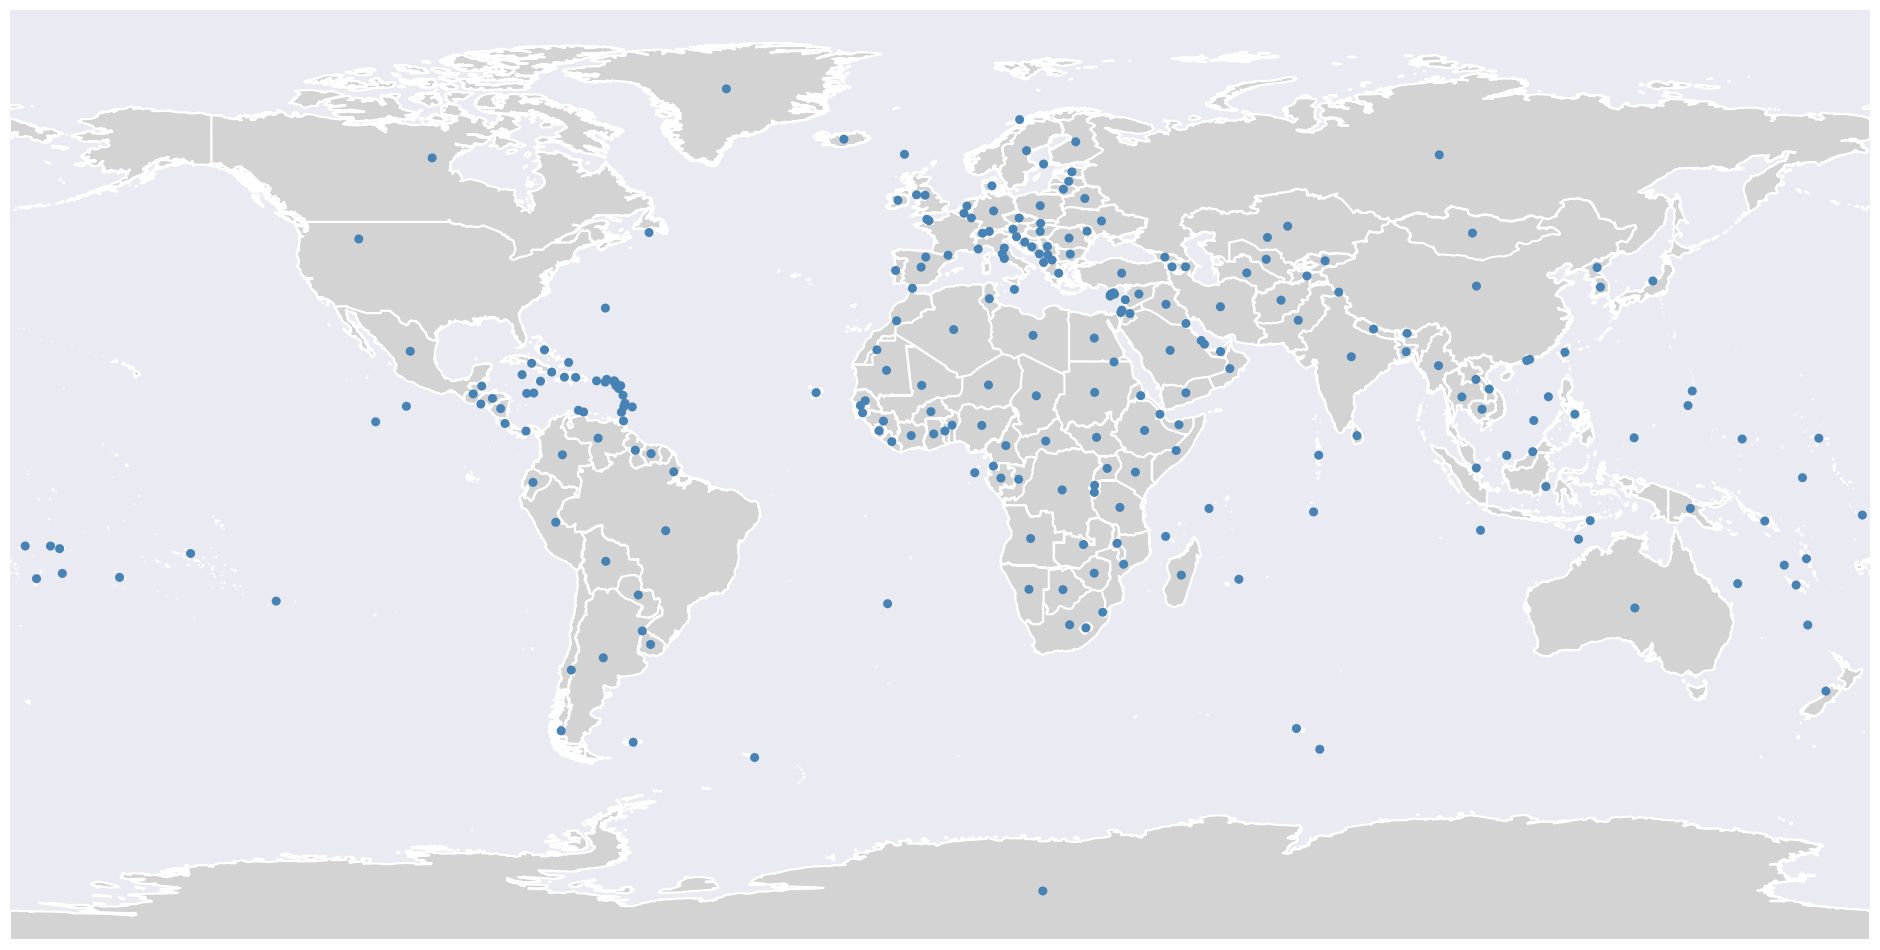

In [37]:
centroids = countries.copy()
centroids.geometry = centroids.centroid
ax = gplt.pointplot(
    centroids, projection=gcrs.PlateCarree(central_longitude=0.0, globe=None),
    figsize=(24, 16),
    rasterized=True,
)
gplt.polyplot(countries.geometry, projection=gcrs.PlateCarree(central_longitude=0.0, globe=None),
              edgecolor='white', facecolor='lightgray',
              extent=[-180, -90, 180, 90],
              ax=ax)

In [38]:
centroids.to_file(pathout + 'centroids.shp')

In [39]:
centroids.loc[centroids.SOVEREIGNT=='Southern Patagonian Ice Field']

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
173,Admin-0 country,0,9,Southern Patagonian Ice Field,SPI,0,2,Indeterminate,None,Southern Patagonian Ice Field,...,Unrecognized,Unrecognized,Unrecognized,Unrecognized,None,None,None,Unrecognized,Unrecognized,POINT (-73.31883 -49.51234)


# Let's compute distances between the centroids. 
# For this we will use the ``geopy`` package. 

In [40]:
from geopy.distance import geodesic, great_circle
import itertools
centroids['xy'] = centroids.geometry.apply(lambda x: [x.y, x.x])

In [41]:
mypairs = pd.DataFrame(index = pd.MultiIndex.from_arrays(
                    np.array([x for x in itertools.product(centroids['ADM0_A3'].tolist(), repeat=2)]).T,
                    names = ['country_1','country_2'])).reset_index()
mypairs = mypairs.merge(centroids[['ADM0_A3', 'xy']], left_on='country_1', right_on='ADM0_A3')
mypairs = mypairs.merge(centroids[['ADM0_A3', 'xy']], left_on='country_2', right_on='ADM0_A3', suffixes=['_1', '_2'])
mypairs

,country_1,country_2,ADM0_A3_1,xy_1,ADM0_A3_2,xy_2
0,IDN,IDN,IDN,"[-2.222961002517387, 117.2704333391668]",IDN,"[-2.222961002517387, 117.2704333391668]"
1,IDN,MYS,IDN,"[-2.222961002517387, 117.2704333391668]",MYS,"[3.7923928509530205, 109.6988684421668]"
2,IDN,CHL,IDN,"[-2.222961002517387, 117.2704333391668]",CHL,"[-37.74360663523242, -71.36437476479367]"
3,IDN,BOL,IDN,"[-2.222961002517387, 117.2704333391668]",BOL,"[-16.7068768105592, -64.68475372880839]"
4,IDN,PER,IDN,"[-2.222961002517387, 117.2704333391668]",PER,"[-9.154388480752162, -74.37806457210715]"
...,...,...,...,...,...,...
66559,SCR,MAC,SCR,"[15.152112822000067, 117.75381196333339]",MAC,"[22.157784411664835, 113.55019787171386]"
66560,SCR,ATC,SCR,"[15.152112822000067, 117.75381196333339]",ATC,"[-12.432577176848286, 123.58636778644266]"
66561,SCR,BJN,SCR,"[15.152112822000067, 117.75381196333339]",BJN,"[15.795009963377407, -79.9878658593175]"
66562,SCR,SER,SCR,"[15.152112822000067, 117.75381196333339]",SER,"[15.864460896333414, -78.63811872766658]"


In [42]:
mypairs['geodesic_dist'] = mypairs.apply(lambda x: geodesic(x.xy_1, x.xy_2).km, axis=1)
mypairs['great_circle_dist'] = mypairs.apply(lambda x: great_circle(x.xy_1, x.xy_2).km, axis=1)
mypairs

,country_1,country_2,ADM0_A3_1,xy_1,ADM0_A3_2,xy_2,geodesic_dist,great_circle_dist
0,IDN,IDN,IDN,"[-2.222961002517387, 117.2704333391668]",IDN,"[-2.222961002517387, 117.2704333391668]",0.000000,0.000000
1,IDN,MYS,IDN,"[-2.222961002517387, 117.2704333391668]",MYS,"[3.7923928509530205, 109.6988684421668]",1073.341454,1074.915491
2,IDN,CHL,IDN,"[-2.222961002517387, 117.2704333391668]",CHL,"[-37.74360663523242, -71.36437476479367]",15491.447867,15482.921743
3,IDN,BOL,IDN,"[-2.222961002517387, 117.2704333391668]",BOL,"[-16.7068768105592, -64.68475372880839]",17899.591177,17899.294953
4,IDN,PER,IDN,"[-2.222961002517387, 117.2704333391668]",PER,"[-9.154388480752162, -74.37806457210715]",18217.220296,18207.778329
...,...,...,...,...,...,...,...,...
66559,SCR,MAC,SCR,"[15.152112822000067, 117.75381196333339]",MAC,"[22.157784411664835, 113.55019787171386]",893.134905,895.894217
66560,SCR,ATC,SCR,"[15.152112822000067, 117.75381196333339]",ATC,"[-12.432577176848286, 123.58636778644266]",3117.742839,3133.757085
66561,SCR,BJN,SCR,"[15.152112822000067, 117.75381196333339]",BJN,"[15.795009963377407, -79.9878658593175]",16072.183081,16060.602969
66562,SCR,SER,SCR,"[15.152112822000067, 117.75381196333339]",SER,"[15.864460896333414, -78.63811872766658]",16135.829664,16124.702173


In [44]:
mypairs.corr(numeric_only=True)

,geodesic_dist,great_circle_dist
geodesic_dist,1.000000,0.999997
great_circle_dist,0.999997,1.000000


Let's now use the cylindrical equal area projection and geopandas distance function to compute the distance between centroids.

In [45]:
centroids_cea = countries_cea.copy()
centroids_cea.reset_index(inplace=True)
centroids_cea.geometry = centroids_cea.centroid
centroids_cea['xy'] = centroids_cea.geometry.apply(lambda x: [x.y, x.x])
mypairs_cea = pd.DataFrame(index = pd.MultiIndex.from_arrays(
                    np.array([x for x in itertools.product(centroids_cea['ADM0_A3'].tolist(), repeat=2)]).T,
                    names = ['country_1','country_2'])).reset_index()
mypairs_cea = mypairs_cea.merge(centroids_cea[['ADM0_A3', 'geometry', 'xy']], left_on='country_1', right_on='ADM0_A3')
mypairs_cea = mypairs_cea.merge(centroids_cea[['ADM0_A3', 'geometry', 'xy']], left_on='country_2', right_on='ADM0_A3', suffixes=['_1', '_2'])

In [46]:
mypairs_cea

,country_1,country_2,ADM0_A3_1,geometry_1,xy_1,ADM0_A3_2,geometry_2,xy_2
0,IDN,IDN,IDN,POINT (13053566.271 -244402.485),"[-244402.48450644588, 13053566.27147316]",IDN,POINT (13053566.271 -244402.485),"[-244402.48450644588, 13053566.27147316]"
1,IDN,MYS,IDN,POINT (13053566.271 -244402.485),"[-244402.48450644588, 13053566.27147316]",MYS,POINT (12211550.168 418637.642),"[418637.64215854264, 12211550.16769715]"
2,IDN,CHL,IDN,POINT (13053566.271 -244402.485),"[-244402.48450644588, 13053566.27147316]",CHL,POINT (-7927268.774 -3670204.431),"[-3670204.4310664986, -7927268.774365294]"
3,IDN,BOL,IDN,POINT (13053566.271 -244402.485),"[-244402.48450644588, 13053566.27147316]",BOL,POINT (-7201342.481 -1814919.515),"[-1814919.5145804614, -7201342.480506779]"
4,IDN,PER,IDN,POINT (13053566.271 -244402.485),"[-244402.48450644588, 13053566.27147316]",PER,POINT (-8281824.471 -999164.638),"[-999164.6380899184, -8281824.47083905]"
...,...,...,...,...,...,...,...,...
66559,SCR,MAC,SCR,POINT (13108294.387 1656478.335),"[1656478.33538606, 13108294.386725157]",MAC,POINT (12640350.411 2390981.940),"[2390981.9398800945, 12640350.411234612]"
66560,SCR,ATC,SCR,POINT (13108294.387 1656478.335),"[1656478.33538606, 13108294.386725157]",ATC,POINT (13757571.530 -1364242.801),"[-1364242.8007381177, 13757571.529629346]"
66561,SCR,BJN,SCR,POINT (13108294.387 1656478.335),"[1656478.33538606, 13108294.386725157]",BJN,POINT (-8904208.497 1725054.531),"[1725054.5313122338, -8904208.497110264]"
66562,SCR,SER,SCR,POINT (13108294.387 1656478.335),"[1656478.33538606, 13108294.386725157]",SER,POINT (-8753955.334 1732450.150),"[1732450.1498870007, -8753955.333704835]"


In [47]:
mypairs_cea['CEA_dist'] = mypairs_cea.apply(lambda x: x.geometry_1.distance(x.geometry_2)/1e3, axis=1)
mypairs_cea

,country_1,country_2,ADM0_A3_1,geometry_1,xy_1,ADM0_A3_2,geometry_2,xy_2,CEA_dist
0,IDN,IDN,IDN,POINT (13053566.271 -244402.485),"[-244402.48450644588, 13053566.27147316]",IDN,POINT (13053566.271 -244402.485),"[-244402.48450644588, 13053566.27147316]",0.000000
1,IDN,MYS,IDN,POINT (13053566.271 -244402.485),"[-244402.48450644588, 13053566.27147316]",MYS,POINT (12211550.168 418637.642),"[418637.64215854264, 12211550.16769715]",1071.733796
2,IDN,CHL,IDN,POINT (13053566.271 -244402.485),"[-244402.48450644588, 13053566.27147316]",CHL,POINT (-7927268.774 -3670204.431),"[-3670204.4310664986, -7927268.774365294]",21258.681949
3,IDN,BOL,IDN,POINT (13053566.271 -244402.485),"[-244402.48450644588, 13053566.27147316]",BOL,POINT (-7201342.481 -1814919.515),"[-1814919.5145804614, -7201342.480506779]",20315.704573
4,IDN,PER,IDN,POINT (13053566.271 -244402.485),"[-244402.48450644588, 13053566.27147316]",PER,POINT (-8281824.471 -999164.638),"[-999164.6380899184, -8281824.47083905]",21348.736825
...,...,...,...,...,...,...,...,...,...
66559,SCR,MAC,SCR,POINT (13108294.387 1656478.335),"[1656478.33538606, 13108294.386725157]",MAC,POINT (12640350.411 2390981.940),"[2390981.9398800945, 12640350.411234612]",870.900172
66560,SCR,ATC,SCR,POINT (13108294.387 1656478.335),"[1656478.33538606, 13108294.386725157]",ATC,POINT (13757571.530 -1364242.801),"[-1364242.8007381177, 13757571.529629346]",3089.711474
66561,SCR,BJN,SCR,POINT (13108294.387 1656478.335),"[1656478.33538606, 13108294.386725157]",BJN,POINT (-8904208.497 1725054.531),"[1725054.5313122338, -8904208.497110264]",22012.609702
66562,SCR,SER,SCR,POINT (13108294.387 1656478.335),"[1656478.33538606, 13108294.386725157]",SER,POINT (-8753955.334 1732450.150),"[1732450.1498870007, -8753955.333704835]",21862.381722


Let's merge the three distance measures and see how similar they are.

In [48]:
dists = mypairs[['country_1', 'country_2', 'geodesic_dist', 'great_circle_dist']].copy()
dists = dists.merge(mypairs_cea[['country_1', 'country_2', 'CEA_dist']])
dists

,country_1,country_2,geodesic_dist,great_circle_dist,CEA_dist
0,IDN,IDN,0.000000,0.000000,0.000000
1,IDN,MYS,1073.341454,1074.915491,1071.733796
2,IDN,CHL,15491.447867,15482.921743,21258.681949
3,IDN,BOL,17899.591177,17899.294953,20315.704573
4,IDN,PER,18217.220296,18207.778329,21348.736825
...,...,...,...,...,...
66559,SCR,MAC,893.134905,895.894217,870.900172
66560,SCR,ATC,3117.742839,3133.757085,3089.711474
66561,SCR,BJN,16072.183081,16060.602969,22012.609702
66562,SCR,SER,16135.829664,16124.702173,21862.381722


In [49]:
dists.corr(numeric_only=True)

,geodesic_dist,great_circle_dist,CEA_dist
geodesic_dist,1.000000,0.999997,0.855468
great_circle_dist,0.999997,1.000000,0.855163
CEA_dist,0.855468,0.855163,1.000000


In [50]:
centroids_merc = countries_merc.copy()
centroids_merc.reset_index(inplace=True)
centroids_merc.geometry = centroids_merc.centroid
centroids_merc['xy'] = centroids_merc.geometry.apply(lambda x: [x.y, x.x])
mypairs_merc = pd.DataFrame(index = pd.MultiIndex.from_arrays(
                    np.array([x for x in itertools.product(centroids_merc['ADM0_A3'].tolist(), repeat=2)]).T,
                    names = ['country_1','country_2'])).reset_index()
mypairs_merc = mypairs_merc.merge(centroids_merc[['ADM0_A3', 'geometry', 'xy']], left_on='country_1', right_on='ADM0_A3')
mypairs_merc = mypairs_merc.merge(centroids_merc[['ADM0_A3', 'geometry', 'xy']], left_on='country_2', right_on='ADM0_A3', suffixes=['_1', '_2'])

In [51]:
mypairs_merc['MERC_dist'] = mypairs_merc.apply(lambda x: x.geometry_1.distance(x.geometry_2)/1e3, axis=1)
mypairs_merc

,country_1,country_2,ADM0_A3_1,geometry_1,xy_1,ADM0_A3_2,geometry_2,xy_2,MERC_dist
0,IDN,IDN,IDN,POINT (13055431.810 -248921.141),"[-248921.14144190453, 13055431.809760388]",IDN,POINT (13055431.810 -248921.141),"[-248921.14144190453, 13055431.809760388]",0.000000
1,IDN,MYS,IDN,POINT (13055431.810 -248921.141),"[-248921.14144190453, 13055431.809760388]",MYS,POINT (12211696.493 422897.505),"[422897.5049133076, 12211696.493171558]",1078.531213
2,IDN,CHL,IDN,POINT (13055431.810 -248921.141),"[-248921.14144190453, 13055431.809760388]",CHL,POINT (-7959811.966 -4915458.954),"[-4915458.9537708275, -7959811.965630335]",21527.123498
3,IDN,BOL,IDN,POINT (13055431.810 -248921.141),"[-248921.14144190453, 13055431.809760388]",BOL,POINT (-7200010.945 -1894653.148),"[-1894653.1483839012, -7200010.9452187605]",20322.189721
4,IDN,PER,IDN,POINT (13055431.810 -248921.141),"[-248921.14144190453, 13055431.809760388]",PER,POINT (-8277554.831 -1032942.536),"[-1032942.5356006415, -8277554.83112532]",21347.388800
...,...,...,...,...,...,...,...,...,...
66559,SCR,MAC,SCR,POINT (13108294.387 1706736.857),"[1706736.857093246, 13108294.386725157]",MAC,POINT (12640349.997 2530481.032),"[2530481.0318028885, 12640349.997044222]",947.378708
66560,SCR,ATC,SCR,POINT (13108294.387 1706736.857),"[1706736.857093246, 13108294.386725157]",ATC,POINT (13757571.532 -1394978.493),"[-1394978.4931683333, 13757571.532360038]",3168.942872
66561,SCR,BJN,SCR,POINT (13108294.387 1706736.857),"[1706736.857093246, 13108294.386725157]",BJN,POINT (-8904208.497 1780995.890),"[1780995.889639691, -8904208.497089265]",22012.628140
66562,SCR,SER,SCR,POINT (13108294.387 1706736.857),"[1706736.857093246, 13108294.386725157]",SER,POINT (-8753955.334 1789031.886),"[1789031.8864233475, -8753955.333704833]",21862.404610


In [52]:
dists = dists.merge(mypairs_merc[['country_1', 'country_2', 'MERC_dist']])
dists

,country_1,country_2,geodesic_dist,great_circle_dist,CEA_dist,MERC_dist
0,IDN,IDN,0.000000,0.000000,0.000000,0.000000
1,IDN,MYS,1073.341454,1074.915491,1071.733796,1078.531213
2,IDN,CHL,15491.447867,15482.921743,21258.681949,21527.123498
3,IDN,BOL,17899.591177,17899.294953,20315.704573,20322.189721
4,IDN,PER,18217.220296,18207.778329,21348.736825,21347.388800
...,...,...,...,...,...,...
66559,SCR,MAC,893.134905,895.894217,870.900172,947.378708
66560,SCR,ATC,3117.742839,3133.757085,3089.711474,3168.942872
66561,SCR,BJN,16072.183081,16060.602969,22012.609702,22012.628140
66562,SCR,SER,16135.829664,16124.702173,21862.381722,21862.404610


In [54]:
dists.corr(numeric_only=True)

,geodesic_dist,great_circle_dist,CEA_dist,MERC_dist
geodesic_dist,1.000000,0.999997,0.855468,0.529885
great_circle_dist,0.999997,1.000000,0.855163,0.530099
CEA_dist,0.855468,0.855163,1.000000,0.573664
MERC_dist,0.529885,0.530099,0.573664,1.000000


# Improving Centroids

## One major issue with the centroids function we used is that it may not set the centroid inside the geometry. E.g., a country composed of islands may have its centroid at sea.

In [55]:
def largest_polygon_centroid(multipolygon):
    if multipolygon.geom_type == "Polygon":
        centroid = multipolygon.centroid
        if centroid.intersects(multipolygon)==False:
            centroid = multipolygon.representative_point()
        return centroid
    elif multipolygon.geom_type == "MultiPolygon":
        areas = np.array([polygon.area for polygon in multipolygon.geoms])
        largest_polygon = multipolygon.geoms[np.argmax(areas)]
        centroid = largest_polygon.centroid
        if centroid.intersects(largest_polygon)==False:
            centroid = largest_polygon.representative_point()
        return centroid
    
def largest_polygon_centroid_representative(multipolygon):
    if multipolygon.geom_type == "Polygon":
        centroid = multipolygon.representative_point()
        return centroid
    elif multipolygon.geom_type == "MultiPolygon":
        areas = np.array([polygon.area for polygon in multipolygon.geoms])
        largest_polygon = multipolygon.geoms[np.argmax(areas)]
        centroid = largest_polygon.representative_point()
        return centroid

In [ ]:
# Largest polygon centroid
centroids_real = countries.copy()
centroids_real.geometry = centroids_real.geometry.apply(largest_polygon_centroid)

# Largest polygon representative point
centroids_repr = countries.copy()
centroids_repr.geometry = centroids_repr.geometry.apply(largest_polygon_centroid_representative)

<GeoAxes: >

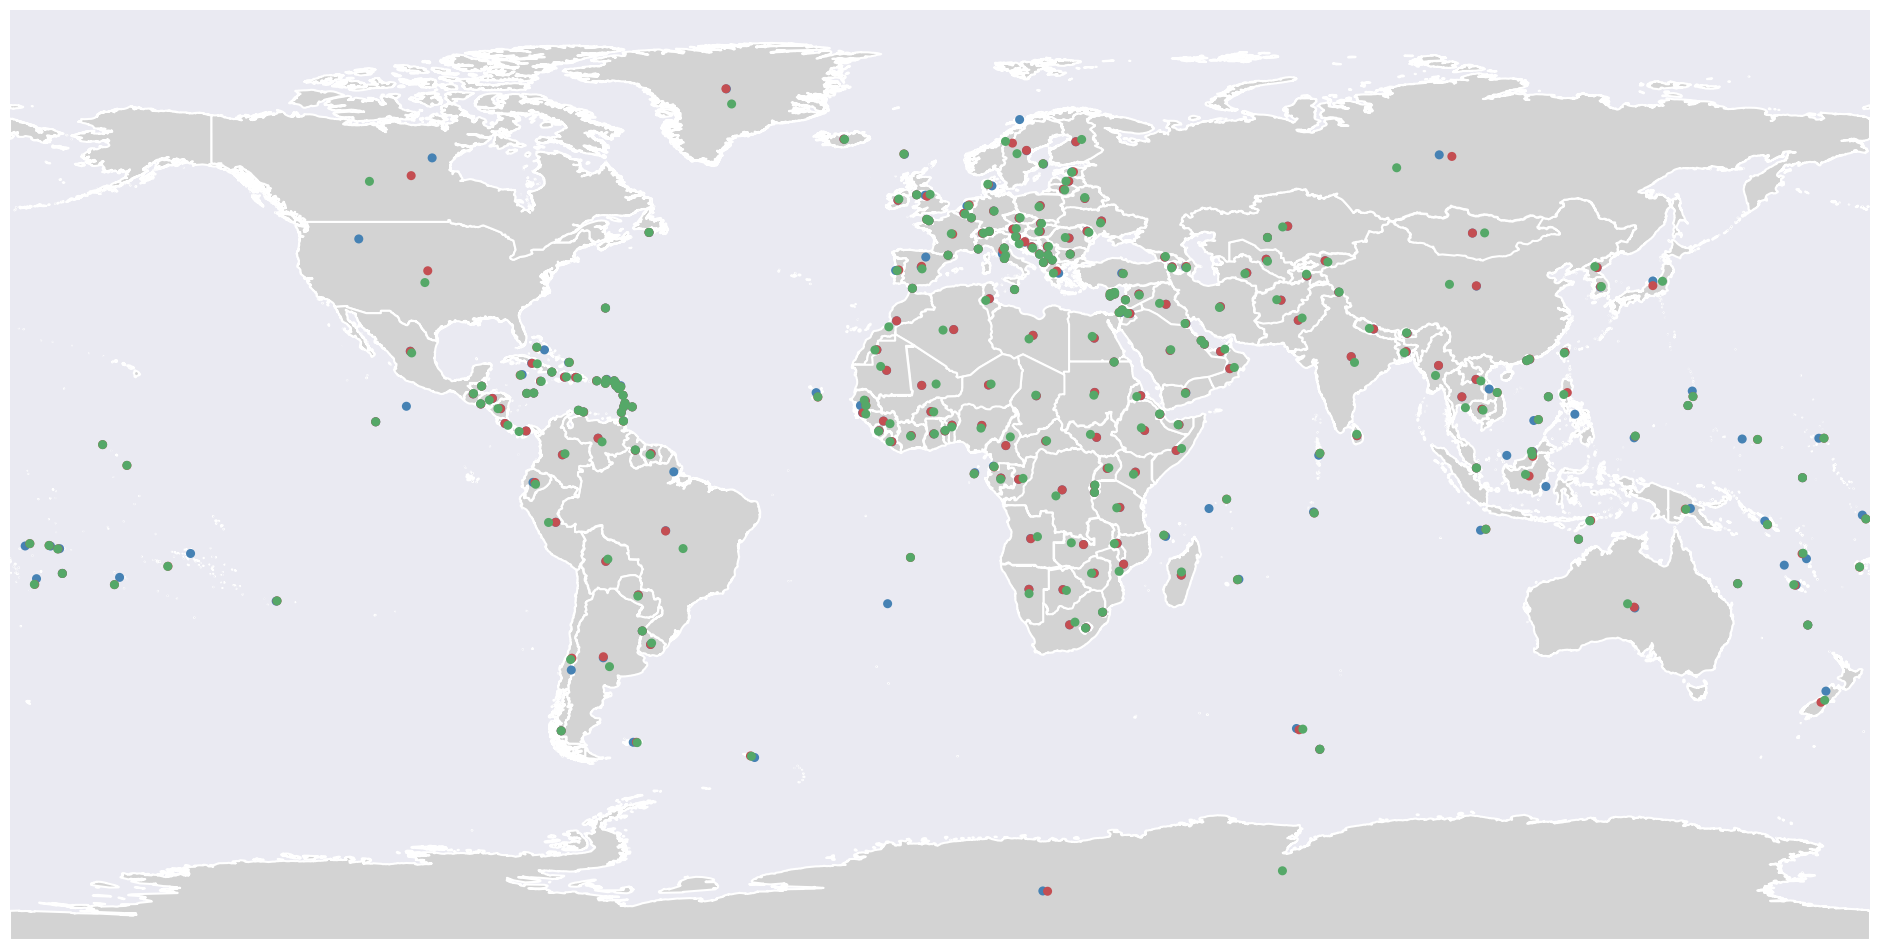

In [ ]:
ax = gplt.pointplot(centroids, 
                    projection=gcrs.PlateCarree(central_longitude=0.0, globe=None),
                    figsize=(24, 16),
                    rasterized=True,
)
gplt.pointplot(centroids_real, 
               projection=gcrs.PlateCarree(central_longitude=0.0, globe=None),
               rasterized=True,
               ax=ax,
               color='r'
)
gplt.pointplot(centroids_repr, 
               projection=gcrs.PlateCarree(central_longitude=0.0, globe=None),
               rasterized=True,
               ax=ax,
               color='g'
)
gplt.polyplot(countries.geometry, 
              projection=gcrs.PlateCarree(central_longitude=0.0, globe=None),
              edgecolor='white', facecolor='lightgray',
              extent=[-180, -90, 180, 90],
              ax=ax)

# Faster and easier distance computations

In [67]:
centroids_real_cea = centroids_real.to_crs(cea).set_index('ADM0_A3')
centroids_repr_cea = centroids_real.to_crs(cea).set_index('ADM0_A3')

In [68]:
%%time
dists_real_repr = centroids_real_cea.geometry.apply(lambda x: centroids_repr_cea.distance(x))

CPU times: user 41.7 ms, sys: 3.18 ms, total: 44.9 ms
Wall time: 42.6 ms


ADM0_A3,IDN,MYS,CHL,BOL,PER,ARG,ESB,CYP,IND,CHN,...,MNP,BHR,CSI,PGA,CLP,MAC,ATC,BJN,SER,SCR
ADM0_A3,,,,,,,,,,,,,,,,,,,,,
IDN,0.000000e+00,4.278081e+05,2.094563e+07,1.997453e+07,2.099543e+07,2.027337e+07,9.652329e+06,9.735165e+06,4.571286e+06,3.972174e+06,...,3.911029e+06,7.602504e+06,5.027521e+06,1.217514e+06,2.487774e+07,2.410575e+06,1.714123e+06,2.166720e+07,2.151805e+07,1.728392e+06
MYS,4.278081e+05,0.000000e+00,2.109990e+07,2.009455e+07,2.109742e+07,2.042960e+07,9.574274e+06,9.658957e+06,4.425511e+06,3.596854e+06,...,3.675979e+06,7.531642e+06,5.162544e+06,7.898146e+05,2.493995e+07,1.993646e+06,2.021008e+06,2.171542e+07,2.156590e+07,1.301577e+06
CHL,2.094563e+07,2.109990e+07,0.000000e+00,1.996631e+06,2.694817e+06,6.790263e+05,1.379566e+07,1.371144e+07,1.788000e+07,2.086765e+07,...,2.473813e+07,1.502043e+07,2.515698e+07,2.138388e+07,6.405849e+06,2.144864e+07,2.181191e+07,5.492172e+06,5.474860e+06,2.170561e+07
BOL,1.997453e+07,2.009455e+07,1.996631e+06,0.000000e+00,1.351578e+06,1.834109e+06,1.224819e+07,1.216034e+07,1.662243e+07,1.957644e+07,...,2.368188e+07,1.362967e+07,2.439153e+07,2.031690e+07,5.771430e+06,2.028361e+07,2.096324e+07,3.934884e+06,3.878980e+06,2.060470e+07
PER,2.099543e+07,2.109742e+07,2.694817e+06,1.351578e+06,0.000000e+00,2.839607e+06,1.290776e+07,1.281718e+07,1.748728e+07,2.040623e+07,...,2.464837e+07,1.441451e+07,2.549785e+07,2.128570e+07,4.430275e+06,2.119474e+07,2.204016e+07,2.803540e+06,2.781227e+06,2.155334e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MAC,2.410575e+06,1.993646e+06,2.144864e+07,2.028361e+07,2.119474e+07,2.079144e+07,8.967055e+06,9.058206e+06,3.783327e+06,1.768283e+06,...,3.656225e+06,7.025395e+06,6.512440e+06,1.235202e+06,2.483130e+07,0.000000e+00,3.915668e+06,2.155548e+07,2.140507e+07,8.687421e+05
ATC,1.714123e+06,2.021008e+06,2.181191e+07,2.096324e+07,2.204016e+07,2.113458e+07,1.117881e+07,1.125809e+07,6.220027e+06,5.600141e+06,...,3.902267e+06,9.128230e+06,3.547907e+06,2.686747e+06,2.603603e+07,3.915668e+06,0.000000e+00,2.287138e+07,2.272352e+07,3.089711e+06
BJN,2.166720e+07,2.171542e+07,5.492172e+06,3.934884e+06,2.803540e+06,5.628218e+06,1.281009e+07,1.271631e+07,1.777831e+07,2.056331e+07,...,2.512815e+07,1.456963e+07,2.639568e+07,2.180430e+07,3.307725e+06,2.155548e+07,2.287138e+07,0.000000e+00,1.504351e+05,2.201261e+07


In [71]:
dists_real_repr = dists_real_repr.reset_index().melt(id_vars='ADM0_A3', value_name='distance')
dists_real_repr

,ADM0_A3,ADM0_A3,distance
0,IDN,IDN,0.000000e+00
1,IDN,IDN,4.278081e+05
2,IDN,IDN,2.094563e+07
3,IDN,IDN,1.997453e+07
4,IDN,IDN,2.099543e+07
...,...,...,...
66559,SCR,SCR,8.687421e+05
66560,SCR,SCR,3.089711e+06
66561,SCR,SCR,2.201261e+07
66562,SCR,SCR,2.186238e+07


# Spatial Joins and Overlays

# Spatial Joins

A *spatial join* uses [binary predicates](http://shapely.readthedocs.io/en/latest/manual.html#binary-predicates) 
such as `intersects` and `crosses` to combine two `GeoDataFrames` based on the spatial relationship 
between their geometries.

A common use case might be a spatial join between a point layer and a polygon layer where you want to retain the point geometries and grab the attributes of the intersecting polygons.

![illustration](https://web.natur.cuni.cz/~langhamr/lectures/vtfg1/mapinfo_1/about_gis/Image23.gif)

## Types of spatial joins

Geopandas currently support the following methods of spatial joins. We refer to the *left_df* and *right_df* which are the correspond to the two dataframes passed in as args.

### Left outer join

In a LEFT OUTER JOIN (`how='left'`), we keep *all* rows from the left and duplicate them if necessary to represent multiple hits between the two dataframes. We retain attributes of the right if they intersect and lose right rows that don't intersect. A left outer join implies that we are interested in retaining the geometries of the left. 

### Right outer join

In a RIGHT OUTER JOIN (`how='right'`), we keep *all* rows from the right and duplicate them if necessary to represent multiple hits between the two dataframes. We retain attributes of the left if they intersect and lose left rows that don't intersect. A right outer join implies that we are interested in retaining the geometries of the right. 

### Inner join

In an INNER JOIN (`how='inner'`), we keep rows from the right and left only where their binary predicate is `True`. We duplicate them if necessary to represent multiple hits between the two dataframes. We retain attributes of the right and left only if they intersect and lose all rows that do not. An inner join implies that we are interested in retaining the geometries of the left. 

## Example using Populated places

In [73]:
headers = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.103 Safari/537.36', 'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8'}

url = 'https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_populated_places.zip'
r = requests.get(url, headers=headers)
populated_places = gp.read_file(io.BytesIO(r.content))

In [74]:
populated_places.head()

,SCALERANK,NATSCALE,LABELRANK,FEATURECLA,NAME,NAMEPAR,NAMEALT,NAMEASCII,ADM0CAP,CAPIN,...,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,FCLASS_TLC,geometry
0,10,1,8.0,Admin-1 capital,Colonia del Sacramento,None,None,Colonia del Sacramento,0,None,...,None,None,None,None,None,None,None,None,None,POINT (-57.83612 -34.46979)
1,10,1,8.0,Admin-1 capital,Trinidad,None,None,Trinidad,0,None,...,None,None,None,None,None,None,None,None,None,POINT (-56.90100 -33.54400)
2,10,1,8.0,Admin-1 capital,Fray Bentos,None,None,Fray Bentos,0,None,...,None,None,None,None,None,None,None,None,None,POINT (-58.30400 -33.13900)
3,10,1,8.0,Admin-1 capital,Canelones,None,None,Canelones,0,None,...,None,None,None,None,None,None,None,None,None,POINT (-56.28400 -34.53800)
4,10,1,8.0,Admin-1 capital,Florida,None,None,Florida,0,None,...,None,None,None,None,None,None,None,None,None,POINT (-56.21500 -34.09900)


## Let's find the places located in each country and count how many there are
## Since `ADM0_A3` is available in both datasets so this is not really necessary, but we do it just to show the power of spatial joins

In [75]:
populated_places['ADM0_A3']

0       URY
1       URY
2       URY
3       URY
4       URY
       ... 
7337    NZL
7338    NZL
7339    NZL
7340    IND
7341    IND
Name: ADM0_A3, Length: 7342, dtype: object

# The number of places in each country is

In [78]:
number_pop_pl = populated_places.groupby(['ADM0_A3'])['geometry'].count()
number_pop_pl

ADM0_A3
ABW     1
AFG    33
AGO    49
ALB    26
ALD     1
       ..
WSM     1
YEM    20
ZAF    72
ZMB    34
ZWE    20
Name: geometry, Length: 225, dtype: int64

# Imagine we did not have `ADM0_A3`

In [79]:
populated_places_noadm = populated_places.copy().drop(columns = ['ADM0_A3'])
populated_places_noadm.head()

,SCALERANK,NATSCALE,LABELRANK,FEATURECLA,NAME,NAMEPAR,NAMEALT,NAMEASCII,ADM0CAP,CAPIN,...,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,FCLASS_TLC,geometry
0,10,1,8.0,Admin-1 capital,Colonia del Sacramento,None,None,Colonia del Sacramento,0,None,...,None,None,None,None,None,None,None,None,None,POINT (-57.83612 -34.46979)
1,10,1,8.0,Admin-1 capital,Trinidad,None,None,Trinidad,0,None,...,None,None,None,None,None,None,None,None,None,POINT (-56.90100 -33.54400)
2,10,1,8.0,Admin-1 capital,Fray Bentos,None,None,Fray Bentos,0,None,...,None,None,None,None,None,None,None,None,None,POINT (-58.30400 -33.13900)
3,10,1,8.0,Admin-1 capital,Canelones,None,None,Canelones,0,None,...,None,None,None,None,None,None,None,None,None,POINT (-56.28400 -34.53800)
4,10,1,8.0,Admin-1 capital,Florida,None,None,Florida,0,None,...,None,None,None,None,None,None,None,None,None,POINT (-56.21500 -34.09900)


## Let's use `gp.sjoin` to get the the spatial join betweemn both geodataframes

In [80]:
mysjoin = populated_places_noadm.sjoin(countries)
mysjoin

,SCALERANK,NATSCALE,LABELRANK_left,FEATURECLA,NAME_left,NAMEPAR,NAMEALT,NAMEASCII,ADM0CAP,CAPIN,...,FCLASS_VN_right,FCLASS_TR_right,FCLASS_ID_right,FCLASS_PL_right,FCLASS_GR_right,FCLASS_IT_right,FCLASS_NL_right,FCLASS_SE_right,FCLASS_BD_right,FCLASS_UA_right
0,10,1,8.0,Admin-1 capital,Colonia del Sacramento,None,None,Colonia del Sacramento,0,None,...,None,None,None,None,None,None,None,None,None,None
1,10,1,8.0,Admin-1 capital,Trinidad,None,None,Trinidad,0,None,...,None,None,None,None,None,None,None,None,None,None
2,10,1,8.0,Admin-1 capital,Fray Bentos,None,None,Fray Bentos,0,None,...,None,None,None,None,None,None,None,None,None,None
3,10,1,8.0,Admin-1 capital,Canelones,None,None,Canelones,0,None,...,None,None,None,None,None,None,None,None,None,None
4,10,1,8.0,Admin-1 capital,Florida,None,None,Florida,0,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7337,8,10,8.0,Populated place,Cambridge,None,None,Cambridge,0,None,...,None,None,None,None,None,None,None,None,None,None
7338,8,10,8.0,Populated place,Kerikeri,None,None,Kerikeri,0,None,...,None,None,None,None,None,None,None,None,None,None
7339,8,10,8.0,Populated place,Turangi,None,None,Turangi,0,None,...,None,None,None,None,None,None,None,None,None,None
7340,4,50,2.0,Admin-1 capital,Leh,None,None,Leh,0,None,...,None,None,None,None,None,None,None,None,None,None


## `sjoin` by default uses the `how=inner` option 
## and keeps the geometries in the left dataframe 
## that intersect the right dataframe
## We're not limited to using the `intersection` binary predicate. Any of the `Shapely` geometry methods that return a Boolean can be used by specifying the `predicate` kwarg.
## You can change this to other options:
## `predicate='touches'`, or `predicate='within'`, etc.

In [82]:
mysjoin.groupby(['ADM0_A3'])['geometry'].count()

ADM0_A3
ABW     1
AFG    33
AGO    48
ALB    26
ALD     1
       ..
WSM     1
YEM    20
ZAF    72
ZMB    34
ZWE    20
Name: geometry, Length: 225, dtype: int64